In [1]:
# !pip install tensorflow==2.10 
# !pip install tensorflow-gpu==2.10
!pip install opencv-python==4.5.4.58 
!pip install matplotlib==3.5.1


In [2]:
!pip install tensorflow-gpu==2.10

In [3]:
!pip install tensorflow==2.10 

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr

In [8]:
data_dir = "D:\image classification project\data"


In [9]:
data_dir

'D:\\image classification project\\data'

In [68]:
data = os.listdir(data_dir)


['happy', 'sad']

In [69]:
data

['happy', 'sad']

In [10]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '35443_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '81BduzygJPL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-2148431416.jpg'

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
35443_hd.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
4239f3d51d092f69d529f372a37b4601.jpg
56f455011e0000b300705475.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
81BduzygJPL._AC_UF10001000_QL80_.jpg
89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png
960x0.jpg
988689_Wallpaper2.jpg
A_Sep20_14_1189155141.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
community-young-people-happy-together_23-2148431416.jpg
compassion.jpg
Couple_Happy_money_062618.jpg
down-to-earth-habits-happy-people.png
es_27x4

In [13]:
img = cv2.imread(os.path.join(data_dir, 'happy', '960x0.jpg'))

In [14]:
from matplotlib import pyplot as plt

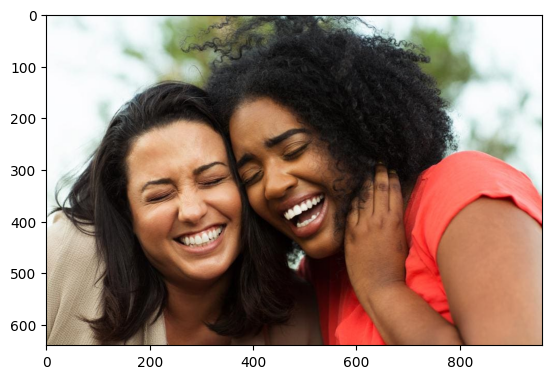

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

In [17]:
# tf.data.datset

In [18]:
import numpy as np
from matplotlib import pyplot as plt


In [19]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 157 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
#class 1 = sad class 0 = happy
batch[1]

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

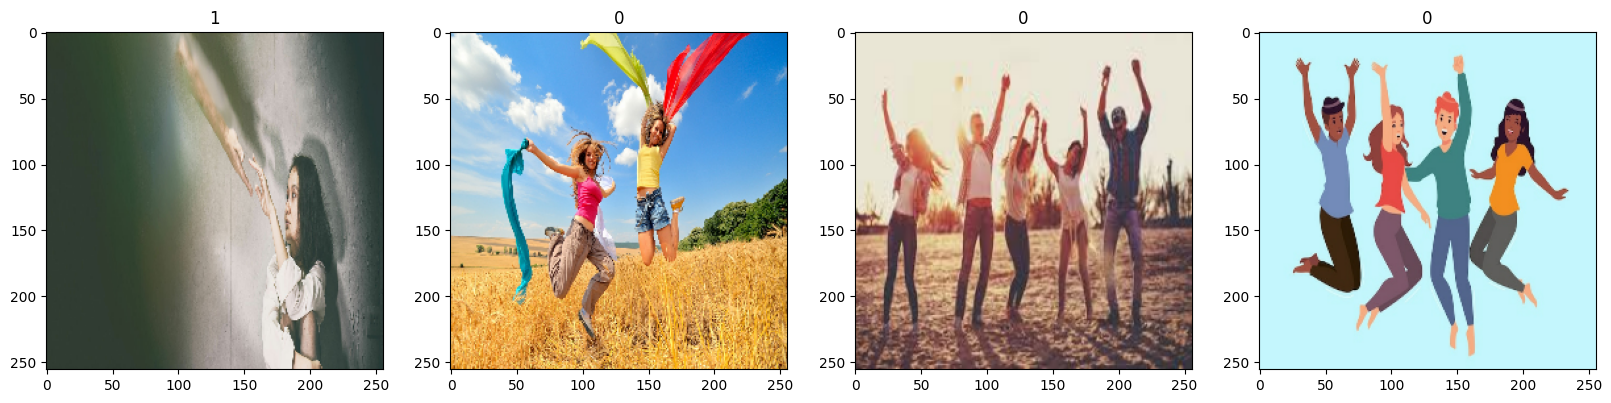

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# preprocess data


In [24]:
 scaled = batch[0] / 255

In [25]:
scaled.max()

1.0

SCALE DATA

In [26]:
data = data.map(lambda x, y: (x/255, y))

In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()


In [29]:
batch[0].max()

1.0

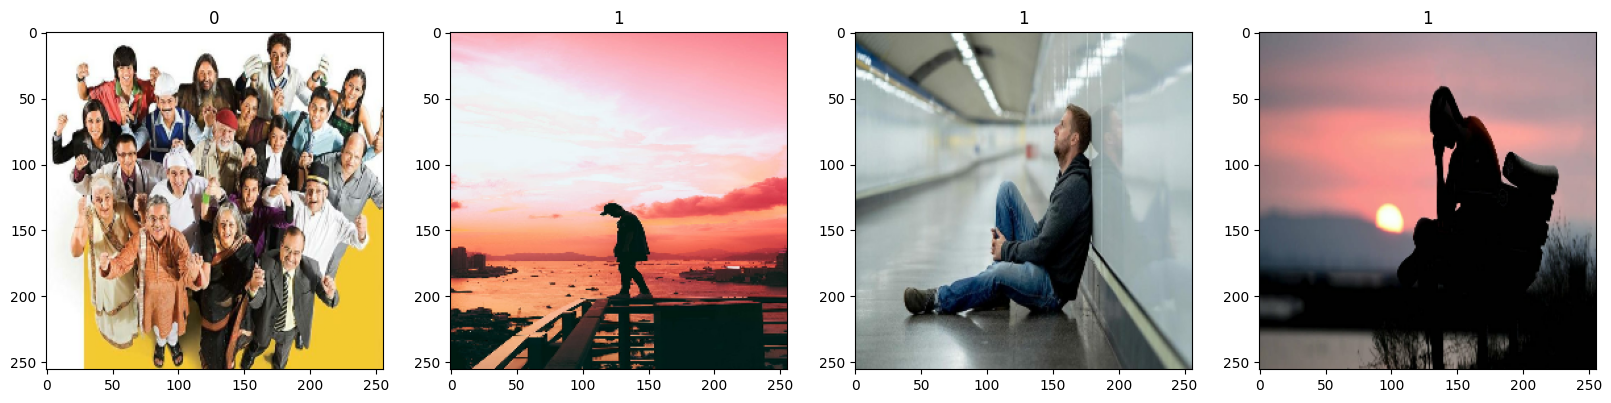

In [30]:
ig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# split data

In [31]:
len(data)

5

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [33]:
train_size+val_size+test_size

5

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(test)

1

## Build deep learning model 

In [36]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import  Dense, Flatten


In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#  Train

In [41]:
logdir='D:\image classification project\log'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 39s 1s/step - loss: 1.4916 - accuracy: 0.5312 - val_loss: 1.1735 - val_accuracy: 0.4062
Epoch 2/20
3/3 [==============================] - 3s 658ms/step - loss: 0.8742 - accuracy: 0.4375 - val_loss: 0.5996 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 2s 581ms/step - loss: 0.6264 - accuracy: 0.5938 - val_loss: 0.5477 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 2s 558ms/step - loss: 0.5197 - accuracy: 0.6562 - val_loss: 0.5205 - val_accuracy: 0.7188
Epoch 5/20
3/3 [==============================] - 2s 616ms/step - loss: 0.5830 - accuracy: 0.6667 - val_loss: 0.5457 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 2s 587ms/step - loss: 0.5104 - accuracy: 0.7917 - val_loss: 0.4793 - val_accuracy: 0.6875
Epoch 7/20
3/3 [==============================] - 2s 667ms/step - loss: 0.4067 - accuracy: 0.7500 - val_loss: 0.4669 - val_accuracy: 0.7812
Epoch 8/20
3/3 [======

# Plot performance

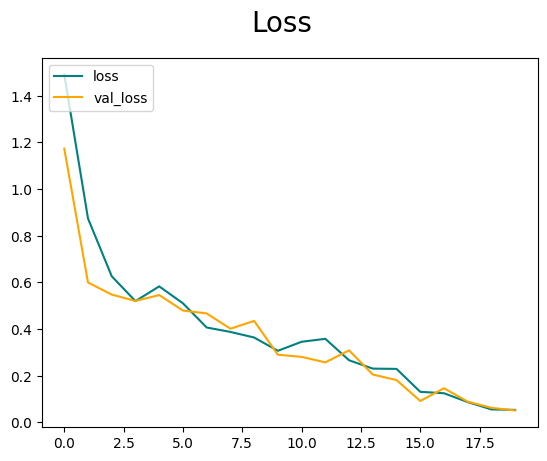

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# evaluating performance

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 597ms/step


In [48]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# test

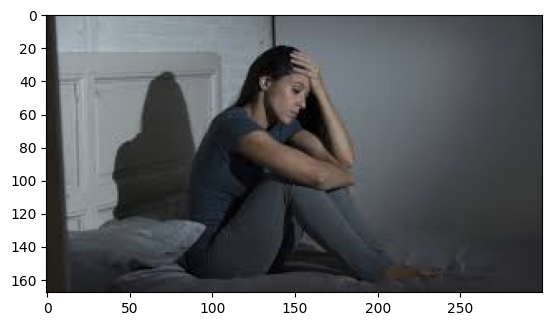

In [49]:
img = cv2.imread("D:\image classification project\sad.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

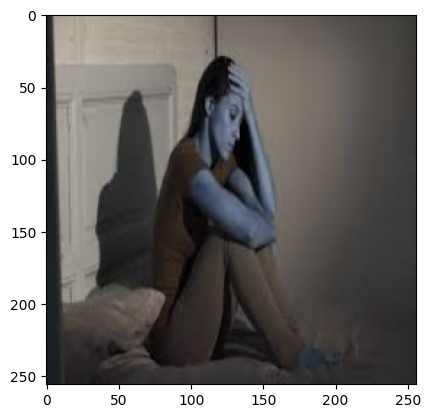

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int)) 
plt.show()

In [51]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 114ms/step


In [53]:
yhat

array([[0.90961707]], dtype=float32)

In [54]:
if yhat >0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


# Saving Model

In [55]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('D:\image classification project\models', 'happysadmodel.h5'))

In [62]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [63]:
new_model

In [64]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 79ms/step


In [65]:
if yhatnew >0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad
